**2022-05-04 `19.2-Neural-Networks - Applying Advanced Machine Learning to Real Data`**

**Objectives**
* Understand the differences between basic neural networks, deep learning, and other machine learning models.
* Increase the performance of a neural network.
* Apply deep learning to a dataset.

**Resources**
* [How To Improve Deep Learning Performance](https://machinelearningmastery.com/improve-deep-learning-performance/)

**Presentation**
* [19.2-Neural-Networks - Applying Advanced Machine Learning to Real Data](https://ucb.bootcampcontent.com/UCB-Coding-Bootcamp/ucb-virt-data-pt-10-2021-u-b/-/blob/master/03-Lesson-Plans/19-Neural-Networks/Slideshows/Data-M_19.2-Neural-Networks.pdf)

**Install**
```
pip install keras-tuner
```

# ==========================================

### 2.01 Everyone Do: Over the Moon on Basic Neural Networks (0:05)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

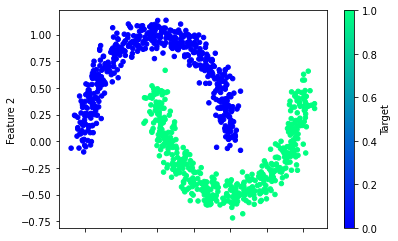

In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
import sklearn as skl
import tensorflow as tf
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [2]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=5, activation="relu", input_dim=2))

# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [4]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 6s 3ms/step - loss: 0.6649 - accuracy: 0.5920
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6336 - accuracy: 0.6333
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6044 - accuracy: 0.6627
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.5767 - accuracy: 0.6987
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5506 - accuracy: 0.7533
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5256 - accuracy: 0.7893
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5024 - accuracy: 0.8347
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.8520
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4607 - accuracy: 0.8573
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.4422 - accuracy: 0.8600
Epoch 11/

In [5]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.2689 - accuracy: 0.8600 - 323ms/epoch - 40ms/step
Loss: 0.2689080536365509, Accuracy: 0.8600000143051147


In [8]:
# Create a new neural network model with 6 neurons
nn_model2 = tf.keras.models.Sequential()

nn_model2.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=2))

nn_model2.add(tf.keras.layers.Dense(units=4, activation="relu"))

nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model2.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 1s 3ms/step - loss: 0.8081 - accuracy: 0.5307
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7593 - accuracy: 0.6013
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7208 - accuracy: 0.6707
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.7400
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6548 - accuracy: 0.7693
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6209 - accuracy: 0.7773
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5894 - accuracy: 0.7760
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5613 - accuracy: 0.7747
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5381 - accuracy: 0.7853
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.5187 - accuracy: 0.7947
Epoch 11/

In [9]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.1009 - accuracy: 1.0000 - 235ms/epoch - 29ms/step
Loss: 0.10094638168811798, Accuracy: 1.0


# ==========================================

### 2.02 Students Do: Back to the Moon (0:15)

### Instructions:

* Upload the starter notebook to Google Colab and run the cells to recreate the moons dummy dataset.

* Create your Keras Sequential model and add **more than one** Dense hidden layer to create a deep learning model.

  * **Notes:**

  * Only your first Dense layer uses the *input_dim* parameter.

  * All of your hidden layers should use the "relu" activation function.

* Compile your model and train the deep learning model on at least 100 epochs.

* Evaluate the performance of your model by calculating the loss and predictive accuracy of the model on your test dataset.

* **Bonus:** If time permits, try recreating your deep learning model with a different set of hidden layers and neurons, and then evaluate the performance of your new model. Are you able to achieve 100% predictive accuracy?

---

In [14]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
import sklearn as skl
import tensorflow as tf
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [15]:
# Create a Keras Sequential model and add more than one Dense hidden layer
nn_model = tf.keras.models.Sequential()

nn_model.add(tf.keras.layers.Dense(units=6, activation="relu", input_dim=2))
# tf.keras.layers.Dense

nn_model.add(tf.keras.layers.Dense(units=6, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=6, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=6, activation="relu"))

nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 6)                 18        
                                                                 
 dense_11 (Dense)            (None, 6)                 42        
                                                                 
 dense_12 (Dense)            (None, 6)                 42        
                                                                 
 dense_13 (Dense)            (None, 6)                 42        
                                                                 
 dense_14 (Dense)            (None, 1)                 7         
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile the model and train over more than 100 epochs
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

fit_model = nn_model.fit(X_train_scaled, y_train, epochs=200)

Epoch 1/200
24/24 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.4147
Epoch 2/200
24/24 [==============================] - 0s 4ms/step - loss: 0.6751 - accuracy: 0.6493
Epoch 3/200
24/24 [==============================] - 0s 3ms/step - loss: 0.6627 - accuracy: 0.6440
Epoch 4/200
24/24 [==============================] - 0s 3ms/step - loss: 0.6438 - accuracy: 0.6693
Epoch 5/200
24/24 [==============================] - 0s 4ms/step - loss: 0.6139 - accuracy: 0.6907
Epoch 6/200
24/24 [==============================] - 0s 4ms/step - loss: 0.5683 - accuracy: 0.8307
Epoch 7/200
24/24 [==============================] - 0s 3ms/step - loss: 0.5119 - accuracy: 0.8587
Epoch 8/200
24/24 [==============================] - 0s 3ms/step - loss: 0.4512 - accuracy: 0.8653
Epoch 9/200
24/24 [==============================] - 0s 3ms/step - loss: 0.3930 - accuracy: 0.8707
Epoch 10/200
24/24 [==============================] - 0s 3ms/step - loss: 0.3456 - accuracy: 0.8773
Epoch 11/

In [17]:
# Evaluate the performance of model using the loss and predictive accuracy of the model on the test dataset.
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 3.1055e-04 - accuracy: 1.0000 - 317ms/epoch - 40ms/step
Loss: 0.00031055117142386734, Accuracy: 1.0


# ==========================================

### 2.03 Instructor Do: Getting Hands-on with Model Optimization (0:10)

![](../Images/optimization_table.png)

[How To Improve Deep Learning Performance](https://machinelearningmastery.com/improve-deep-learning-performance/)

In [18]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt

# Example outlier plot of reaction times
times = [96,98,100,105,85,88,95,100,101,102,97,98,75]
fig1, ax1 = plt.subplots()
ax1.set_title('Reaction Times at Baseball Batting Cage')
ax1.set_ylabel('Reaction Time (ms)')
ax1.boxplot(times)
plt.show()

In [22]:
# Determine which data points are outside of the 1.5*IQR range
quartiles = np.quantile(times,[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)

# Print the the potential outliers
potential_outliers = [print(time) if time < lower_bound or time > upper_bound else next for time in times]

85
75


# ==========================================

### 2.04 Instructor Do: Take the Guesswork out of Model Optimization (0:15)

In [23]:
# !pip install keras-tuner

In [24]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
import sklearn as skl
import tensorflow as tf
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=2))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [31]:
# pwd

In [26]:
# Import the kerastuner library
# import kerastuner as kt
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

In [27]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 04s]
val_accuracy: 0.9800000190734863

Best val_accuracy So Far: 0.9800000190734863
Total elapsed time: 00h 02m 25s
INFO:tensorflow:Oracle triggered exit


In [28]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 9,
 'num_layers': 5,
 'units_0': 3,
 'units_1': 5,
 'units_2': 9,
 'units_3': 5,
 'units_4': 1,
 'units_5': 5,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [29]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.4359 - accuracy: 0.9800 - 351ms/epoch - 44ms/step
Loss: 0.43587446212768555, Accuracy: 0.9800000190734863


# ==========================================

### 2.05 Student Do: Giving Your Model Building a Tune-up (0:15)

### Instructions:

* Run the the starter code provided in Google Colab to create the circles dummy dataset.

* Convert the circles dataset to a dataframe and plot the circles dataset using Pandas.

* Create a method that creates and compiles a new Sequential deep learning model with hyperparameter options. Be sure to include the following features:

  * Allow kerastuner to select between **relu** and **tanh** activation functions for each hidden layer.

  * Allow kerastuner to decide from 1 to 30 neurons in the first dense layer.

    * **Note:** To limit the tuner runtime, increase your *step* argument to at least 5.

  * Allow kerastuner to decide from 1 to 5 hidden layers and 1 to 30 neurons in each dense layer.

* Import the `kerastuner` library and create a **Hyperband** tuner instance. Your tuner instance should use the following parameters:

  * The *objective* is "val_accuracy"

  * *max_epochs* equal to 20

  * *hyperband_iterations* equal to two.

  * If you want to rerun the code again, you'll need to add `overwrite=True` as a paremeter. 

* Run the `kerastuner` search for best hyperparameters over 20 epochs.

* Retrieve the top 3 model hyperparameters from the tuner search and print the values.

* Retrieve the top 3 models from the tuner search and compare their predictive accuracy against the test dataset.

---

In [28]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
import sklearn as skl
import tensorflow as tf
from sklearn.datasets import make_circles

# Creating dummy nonlinear data
X_circles, y_circles = make_circles(n_samples=1000, noise=0.05, random_state=78)

# Transforming y_circles to a vertical vector
y_circles = y_circles.reshape(-1, 1)

# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_circles, y_circles, random_state=78)

# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

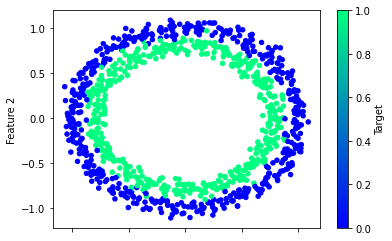

In [29]:
# Creating a DataFrame to plot the nonlinear dummy data
df_circles = pd.DataFrame(X_circles, columns=["Feature 1", "Feature 2"])
df_circles["Target"] = y_circles

# Plot the nonlinear dummy data
df_circles.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [30]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=2))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [31]:
# Import the kerastuner library
# import kerastuner as kt
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2,
    overwrite=True)

In [32]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 02s]
val_accuracy: 0.6399999856948853

Best val_accuracy So Far: 0.7879999876022339
Total elapsed time: 00h 01m 54s
INFO:tensorflow:Oracle triggered exit


In [33]:
# Get top three model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)

{'activation': 'relu', 'first_units': 16, 'num_layers': 2, 'units_0': 11, 'units_1': 11, 'units_2': 26, 'units_3': 16, 'units_4': 21, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
{'activation': 'tanh', 'first_units': 21, 'num_layers': 5, 'units_0': 11, 'units_1': 11, 'units_2': 6, 'units_3': 26, 'units_4': 16, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0020'}
{'activation': 'tanh', 'first_units': 26, 'num_layers': 3, 'units_0': 26, 'units_1': 26, 'units_2': 11, 'units_3': 26, 'units_4': 16, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}


In [34]:
# Evaluate the top three models against the test dataset
top_model = tuner.get_best_models(3)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.5724 - accuracy: 0.7880 - 267ms/epoch - 33ms/step
Loss: 0.5724215507507324, Accuracy: 0.7879999876022339
8/8 - 0s - loss: 0.6573 - accuracy: 0.6760 - 307ms/epoch - 38ms/step
Loss: 0.6573354601860046, Accuracy: 0.6759999990463257
8/8 - 0s - loss: 0.6793 - accuracy: 0.6400 - 215ms/epoch - 27ms/step
Loss: 0.6792681813240051, Accuracy: 0.6399999856948853


In [35]:
# Get second best model hyperparameters
second_hyper = tuner.get_best_hyperparameters(2)[1]
second_hyper.values

{'activation': 'tanh',
 'first_units': 21,
 'num_layers': 5,
 'units_0': 11,
 'units_1': 11,
 'units_2': 6,
 'units_3': 26,
 'units_4': 16,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 1,
 'tuner/round': 1,
 'tuner/trial_id': '0020'}

In [36]:
# Compare the performance to the second-best model
second_model = tuner.get_best_models(2)[1]
model_loss, model_accuracy = second_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.6573 - accuracy: 0.6760 - 225ms/epoch - 28ms/step
Loss: 0.6573354601860046, Accuracy: 0.6759999990463257


# ==========================================

### 2.06 Instructor Do: Getting Real with Neural Network Datasets (0:10)

In [32]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import our input dataset
attrition_df = pd.read_csv('06-Ins_GettingReal/Resources/HR-Employee-Attrition.csv')
attrition_df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [34]:
# Generate our categorical variable lists
attrition_cat = attrition_df.dtypes[attrition_df.dtypes == "object"].index.tolist()

In [35]:
attrition_cat

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [39]:
# Check the number of unique values in each column
attrition_df[attrition_cat].nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [36]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(attrition_df[attrition_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(attrition_cat)
encode_df.head()

C:\Users\k\anaconda3\envs\PythonData\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Attrition_No  Attrition_Yes  BusinessTravel_Non-Travel  \
0           0.0            1.0                        0.0   
1           1.0            0.0                        0.0   
2           0.0            1.0                        0.0   
3           1.0            0.0                        0.0   
4           1.0            0.0                        0.0   

   BusinessTravel_Travel_Frequently  BusinessTravel_Travel_Rarely  \
0                               0.0                           1.0   
1                               1.0                           0.0   
2                               0.0                           1.0   
3                               1.0                           0.0   
4                               0.0                           1.0   

   Department_Human Resources  Department_Research & Development  \
0                         0.0                                0.0   
1                         0.0                                1.0   
2                         0.0                                1.0   
3                         0.0                                1.0   
4                         0.0                                1.0   

   Department_Sales  EducationField_Human Resources  \
0               1.0                             0.0   
1               0.0                             0.0   
2               0.0                             0.0   
3               0.0                             0.0   
4               0.0                             0.0   

   EducationField_Life Sciences  ...  JobRole_Research Director  \
0                           1.0  ...                        0.0   
1                           1.0  ...                        0.0   
2                           0.0  ...                        0.0   
3                           1.0  ...                        0.0   
4                           0.0  ...                        0.0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                         0.0                      1.0   
1                         1.0                      0.0   
2                         0.0                      0.0   
3                         1.0                      0.0   
4                         0.0                      0.0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                           0.0                     0.0   
1                           0.0                     0.0   
2                           0.0                     0.0   
3                           0.0                     0.0   
4                           0.0                     0.0   

   MaritalStatus_Married  MaritalStatus_Single  Over18_Y  OverTime_No  \
0                    0.0                   1.0       1.0          0.0   
1                    1.0                   0.0       1.0          1.0   
2                    0.0                   1.0       1.0          0.0   
3                    1.0                   0.0       1.0          0.0   
4                    1.0                   0.0       1.0          1.0   

   OverTime_Yes  
0           1.0  
1           0.0  
2           1.0  
3           1.0  
4           0.0  

[5 rows x 31 columns]

In [37]:
# Merge one-hot encoded features and drop the originals
attrition_df = attrition_df.merge(encode_df,left_index=True, right_index=True)
attrition_df = attrition_df.drop(attrition_cat,1)
attrition_df.head()

C:\Users\k\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


Age  DailyRate  DistanceFromHome  Education  EmployeeCount  EmployeeNumber  \
0   41       1102                 1          2              1               1   
1   49        279                 8          1              1               2   
2   37       1373                 2          2              1               4   
3   33       1392                 3          4              1               5   
4   27        591                 2          1              1               7   

   EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  ...  \
0                        2          94               3         2  ...   
1                        3          61               2         2  ...   
2                        4          92               2         1  ...   
3                        4          56               3         1  ...   
4                        1          40               3         1  ...   

   JobRole_Research Director  JobRole_Research Scientist  \
0                        0.0                         0.0   
1                        0.0                         1.0   
2                        0.0                         0.0   
3                        0.0                         1.0   
4                        0.0                         0.0   

   JobRole_Sales Executive  JobRole_Sales Representative  \
0                      1.0                           0.0   
1                      0.0                           0.0   
2                      0.0                           0.0   
3                      0.0                           0.0   
4                      0.0                           0.0   

   MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
0                     0.0                    0.0                   1.0   
1                     0.0                    1.0                   0.0   
2                     0.0                    0.0                   1.0   
3                     0.0                    1.0                   0.0   
4                     0.0                    1.0                   0.0   

   Over18_Y  OverTime_No  OverTime_Yes  
0       1.0          0.0           1.0  
1       1.0          1.0           0.0  
2       1.0          0.0           1.0  
3       1.0          0.0           1.0  
4       1.0          1.0           0.0  

[5 rows x 57 columns]

In [38]:
# Split our preprocessed data into our features and target arrays
y = attrition_df["Attrition_Yes"].values
X = attrition_df.drop(["Attrition_Yes","Attrition_No"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

C:\Users\k\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [45]:
X_train.shape[1]

55

In [48]:
len(X_train[0])

55

In [47]:
attrition_df["Attrition_Yes"].shape

(1470,)

In [49]:
# Define the model - deep neural net
number_input_features = len(X_train[0])
hidden_nodes_layer1 =  8
hidden_nodes_layer2 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 448       
                                                                 
 dense_8 (Dense)             (None, 5)                 45        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 499
Trainable params: 499
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [51]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 3ms/step - loss: 0.5084 - accuracy: 0.8140
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4633 - accuracy: 0.8212
Epoch 3/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4372 - accuracy: 0.8276
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4205 - accuracy: 0.8285
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4082 - accuracy: 0.8294
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3982 - accuracy: 0.8294
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3894 - accuracy: 0.8294
Epoch 8/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3813 - accuracy: 0.8312
Epoch 9/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3743 - accuracy: 0.8358
Epoch 10/100
35/35 [==============================] - 0s 3ms/step - loss: 0.3672 - accuracy: 0.8421
Epoch 11/

In [52]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

12/12 - 0s - loss: 0.4097 - accuracy: 0.8832 - 215ms/epoch - 18ms/step
Loss: 0.40974903106689453, Accuracy: 0.883152186870575


# ==========================================

### 2.07 Everyone Do: Detecting Diabetes through Deep Learning (0:15)

### Instructions:

* Upload the [DetectingDiabetes_starter.ipynb](07-Stu_DetectingDiabetes/Unsolved/DetectingDiabetes_starter.ipynb) notebook into Google Colab, and run the code to import the dependencies and load the diabetes dataset.

* Separate the diabetes **Outcome** target from the other features in the dataset

* Split the features and target into training and test datasets

* Preprocess the input data accordingly:

  * If preprocessing categorical data use Scikit-learn's **OneHotEncoder** module.

  * If preprocessing numerical data use Scikit-learn's **StandardScaler** module.

* Define a deep learning model with the following features:

  * A first dense layer with 8 inputs and the "relu" activation function

  * A second dense layer with at least 8 neurons and the "relu" activation function

  * An output layer with one neuron and the "sigmoid" activation function

* Compile and train the model across no more than 100 epochs

* Evaluate the performance of the deep learning model by calculating the test loss and predictive accuracy.

---

In [53]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf

# Import our input dataset
diabetes_df = pd.read_csv('https://2u-data-curriculum-team.s3.amazonaws.com/dataviz-classroom/v1.1/21-Deep-Learning/diabetes.csv')
diabetes_df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [58]:
len(diabetes_df)

768

In [54]:
# Remove diabetes outcome target from features data
y = diabetes_df.Outcome.values
X = diabetes_df.drop(columns="Outcome").values

# y = diabetes_df["Outcome"]
# X = diabetes_df.drop(columns="Outcome", axis=1)

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [55]:
# Preprocess numerical data for neural network

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [57]:
# Define the deep learning model 
nn_model = tf.keras.models.Sequential()
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu", input_dim=8))
nn_model.add(tf.keras.layers.Dense(units=16, activation="relu"))
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=200)

# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/200
18/18 [==============================] - 1s 2ms/step - loss: 0.7194 - accuracy: 0.4705
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 0.6743 - accuracy: 0.6007
Epoch 3/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6443 - accuracy: 0.6580
Epoch 4/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6246 - accuracy: 0.6701
Epoch 5/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6057 - accuracy: 0.6840
Epoch 6/200
18/18 [==============================] - 0s 4ms/step - loss: 0.5901 - accuracy: 0.6875
Epoch 7/200
18/18 [==============================] - 0s 4ms/step - loss: 0.5764 - accuracy: 0.6962
Epoch 8/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5642 - accuracy: 0.6997
Epoch 9/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5527 - accuracy: 0.6979
Epoch 10/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5428 - accuracy: 0.7066
Epoch 11/

# ==========================================

### Rating Class Objectives

* rate your understanding using 1-5 method in each objective

In [ ]:
title = "19.2-Neural-Networks - Applying Advanced Machine Learning to Real Data"
objectives = [
    "Understand the differences between basic neural networks, deep learning, and other machine learning models",
    "Increase the performance of a neural network",
    "Apply deep learning to a dataset",
]
rating = []
total = 0
for i in range(len(objectives)):
    rate = input(objectives[i]+"? ")
    total += int(rate)
    rating.append(objectives[i] + ". (" + rate + "/5)")
print("="*96)
print(f"Self Evaluation for: {title}")
print("-"*24)
for i in rating:
    print(i)
print("-"*64)
print("Average: " + str(total/len(objectives)))